In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [4]:
kto = pd.read_excel("./data/실습데이터/kto_201001.xlsx", usecols = "A:G", header = 1,
                   skipfooter = 4)
kto.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131,18238,421,4339,80916,433045
1,일본,202825,1750,89,549,3971,209184
2,대만,35788,41,17,37,516,36399
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554


In [5]:
kto.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537
66,교포,0,0,0,0,22537,22537


# 데이터 탐색

- 데이터가 2010년 01월부터 2020년 05월까지 월별로 분할되어 있기 때문에 각각 월별로 데이터를 하나씩 가져와 하나의 테이블로 통합해야함

In [6]:
kto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [7]:
kto.shape

(67, 7)

In [8]:
kto.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11964.716418,683.462687,81.731343,152.776119,4115.910448,16998.597015
std,47055.349998,2639.234303,370.034666,622.299519,11560.294887,59189.624627
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,254.000000,23.500000,0.000000,6.000000,161.500000,605.000000
50%,554.000000,47.000000,2.000000,17.000000,449.000000,1350.000000
75%,3638.000000,301.000000,14.000000,54.500000,1608.000000,7582.000000
max,329131.000000,18238.000000,2159.000000,4339.000000,80916.000000,433045.000000


- 평균적으로 관광 목적으로 가장 많은 외국인이 입국함
- 계를 제외한 모든 컬럼에서 최솟값이 0임
    - 확인 필요

In [10]:
kto[(kto["관광"] == 0)|(kto["상용"] == 0)|(kto["공용"] == 0)|(kto["유학/연수"] == 0)|(kto["기타"] == 0)]

,국적,관광,상용,공용,유학/연수,기타,계
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
6,말레이시아,3292,61,0,49,1157,4559
16,캄보디아,102,22,0,25,131,280
19,이란,69,309,0,3,217,598
20,이스라엘,792,11,0,0,53,856
24,GCC,223,134,0,18,55,430
38,스위스,512,30,0,7,77,626
40,덴마크,378,28,0,5,94,505
41,노르웨이,517,274,0,6,149,946


- 교포소계와 교포는 4개 컬럼이 모두 0임

## 기준년월 추가

- 각 월별 데이터가 추가될 예정이기 때문에 각 데이터마다 기준년월 정보가 추가되어야 구별이 가능

In [11]:
kto["기준년월"] = "2010-01"

In [12]:
kto.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,329131,18238,421,4339,80916,433045,2010-01
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01


## 국적 컬럼 확인 

In [13]:
kto["국적"].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

- 아시아주, 미주, 교포소계 등 국가가 아닌 값이 포함되어 있음

In [15]:
contents_list = ["아시아주", "미주", "구주", "대양주", "아프리카주", "기타대륙", "교포소계"]

In [16]:
kto_country = kto[kto["국적"].isin(contents_list) == False]

In [17]:
kto_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01
5,태국,13374,39,13,53,4335,17814,2010-01


In [20]:
# 인덱스 번호가 바뀌어서 초기화
kto_country_newindex = kto_country.reset_index(drop = True)

In [21]:
kto_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,202825,1750,89,549,3971,209184,2010-01
1,대만,35788,41,17,37,516,36399,2010-01
2,홍콩,13874,55,0,21,595,14545,2010-01
3,마카오,554,0,0,0,0,554,2010-01
4,태국,13374,39,13,53,4335,17814,2010-01


- 대륙 컬럼 추가

In [22]:
kto[kto["국적"].isin(contents_list)]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,329131,18238,421,4339,80916,433045,2010-01
26,미주,33067,1391,2159,200,17022,53839,2010-01
32,구주,28798,2250,119,476,14866,46509,2010-01
56,대양주,9249,393,14,15,1701,11372,2010-01
60,아프리카주,563,621,25,88,841,2138,2010-01
63,기타대륙,10,3,0,0,0,13,2010-01
65,교포소계,0,0,0,0,22537,22537,2010-01


- 대륙 컬럼의 내용은 순서대로 아시아 25개, 미주 5개, 유럽 23개, 오세아니아 3개, 아프리카 2개, 기타 1개, 교포 1걔

In [26]:
continents = ["아시아"] * 25 + ["아메리카"] * 5 + ["유럽"] * 23 + ["오세아니아"] * 3 + ["아프리카"] * 2 + ["기타대륙"] + ["교포"]

In [27]:
kto_country_newindex["대륙"] = continents

In [28]:
kto_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아
1,대만,35788,41,17,37,516,36399,2010-01,아시아
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아
3,마카오,554,0,0,0,0,554,2010-01,아시아
4,태국,13374,39,13,53,4335,17814,2010-01,아시아


## 국적별 관광객 비율 

In [31]:
kto_country_newindex["관광객비율(%)"] = round(kto_country_newindex["관광"] / kto_country_newindex["계"] * 100, 1)

In [32]:
kto_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1


In [33]:
# 관광객 비율 컬럼으로 내림차순 정렬
kto_country_newindex.sort_values("관광객비율(%)", ascending = False)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
19,이스라엘,792,11,0,0,53,856,2010-01,아시아,92.5
36,이탈리아,1157,40,12,12,155,1376,2010-01,유럽,84.1
53,오스트레일리아,6974,340,9,10,1098,8431,2010-01,오세아니아,82.7
43,포르투갈,256,9,0,1,44,310,2010-01,유럽,82.6
35,스위스,512,30,0,7,77,626,2010-01,유럽,81.8
55,대양주 기타,730,0,4,4,168,906,2010-01,오세아니아,80.6


In [34]:
# 대륙별 관광객 비율 평균
kto_country_newindex.pivot_table(index = "대륙", values = "관광객비율(%)", aggfunc = "mean")

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,76.900000
아메리카,60.760000
아시아,49.544000
아프리카,26.550000
오세아니아,79.733333
유럽,60.926087


- 평균 관광객 비율이 높은 대륙은 오세아니아
- 아프리카에서 관광목적으로 방문하는 외국인은 26.6%뿐임
- 아시아의 관광객 비율은 49.5%로 유럽보다 낮음

In [35]:
# 중국 국적 필터링
kto_country_newindex[kto_country_newindex["국적"] == "중국"]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3


## 전체 외국인 관광객 대비 국적별 관광객 비율

In [36]:
# 전체 외국인 관광객
tourist_sum = sum(kto_country_newindex["관광"])
tourist_sum

400818

In [37]:
kto_country_newindex["전체비율(%)"] = round(kto_country_newindex["관광"] / tourist_sum * 100, 1)

In [38]:
kto_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [39]:
# 전체비율 컬럼 기준으로 내림차순 정렬
kto_country_newindex.sort_values("전체비율(%)", ascending = False)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
25,미국,26943,1195,2145,135,12647,43065,2010-01,아메리카,62.6,6.7
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
53,오스트레일리아,6974,340,9,10,1098,8431,2010-01,오세아니아,82.7,1.7
31,독일,5838,255,24,68,1458,7643,2010-01,유럽,76.4,1.5
30,영국,5746,383,4,20,1368,7521,2010-01,유럽,76.4,1.4
47,러시아,4861,505,15,83,5409,10873,2010-01,유럽,44.7,1.2


# 데이터 전처리

- 모든 파일에 대해 같은 작업을 반복해야하기 때문에 함수로 정리해야함

In [41]:
def create_kto_data(yy, mm):
    # 1. 불러올 엑셀 파일 경로를 지정
    file_path = f"./data/실습데이터/kto_{yy}{mm}.xlsx"
    
    # 2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, usecols = "A:G", header = 1, skipfooter = 4)
    
    # 3. "기준년월" 컬럼 추가
    df["기준년월"] = f"{yy}-{mm}"
    
    # 4. "국적" 컬럼에서 대륙 제거하고 국가만 남기기
    # 제거할 대륙명 선정
    ignore_list = ["아시아주", "미주", "구주", "대양주", "아프리카주", "기타대륙", "교포소계"]
    condition = (df["국적"].isin(ignore_list) == False) # 대륙이 미포함된 데이터만 추출
    df_country = df[condition].reset_index(drop = True)
    
    # 5. "대륙" 컬럼 추가
    continents = ["아시아"] * 25 + ["아메리카"] * 5 + ["유럽"] * 23 + ["오세아니아"] * 3 + ["아프리카"] * 2 + ["기타대륙"] + ["교포"]
    df_country["대륙"] = continents
    
    # 6. 국가별 "관광객비율(%)" 컬럼 추가
    df_country["관광객비율(%)"] = round(df_country["관광"] / df_country["계"] * 100, 1)
    
    # 7. "전체비율(%)" 컬럼 추가
    tourist_sum = sum(df_country["관광"])
    df_country["전체비율(%)"] = round(df_country["관광"] / tourist_sum * 100, 1)
    
    return df_country

In [47]:
"2".zfill(2)

'02'

In [48]:
# 2010년 3월 데이터로 함수 테스트
kto_test = create_kto_data(2010, "2".zfill(2))

In [49]:
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,224475,1455,63,1172,3197,230362,2010-02,아시아,97.4,50.3
1,대만,35758,45,18,234,596,36651,2010-02,아시아,97.6,8.0
2,홍콩,22462,47,0,65,477,23051,2010-02,아시아,97.4,5.0
3,마카오,916,0,0,2,0,918,2010-02,아시아,99.8,0.2
4,태국,12358,33,36,131,4125,16683,2010-02,아시아,74.1,2.8


## 반복문을 통해 다수의 엑셀 데이터를 불러와서 합치기

In [50]:
df = pd.DataFrame()

for yy in range(2010, 2021):
    for mm in range(1, 13):
        tmp = create_kto_data(str(yy), str(mm).zfill(2))
        df = pd.concat([df, tmp], ignore_index = True)
        if yy == 2020 and mm == 5:
            break

In [52]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [53]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0
7499,교포,0,0,0,0,790,790,2020-05,교포,0.0,0.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [56]:
# 통합 데이터 저장
df.to_excel("kto_total.xlsx", index = False)

# 데이터 분석

## 꺾은 선 그래프 

In [57]:
# 중국 국적 데이터 필터링
df_filter = df[df["국적"] == "중국"]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


In [58]:
x_tick = [f"{i}-01" for i in range(2010, 2021)]

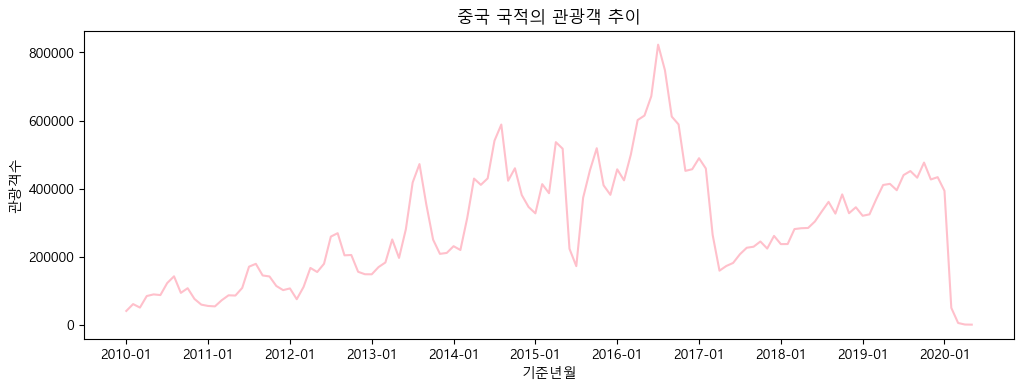

In [61]:
plt.figure(figsize = (12, 4))

plt.plot(df_filter["기준년월"], df_filter["관광"], color = "pink")
plt.title("중국 국적의 관광객 추이")
plt.xlabel("기준년월")
plt.ylabel("관광객수")
plt.xticks(x_tick)

plt.show()

In [64]:
country_list = ["일본", "중국", "대만", "미국", "홍콩"]

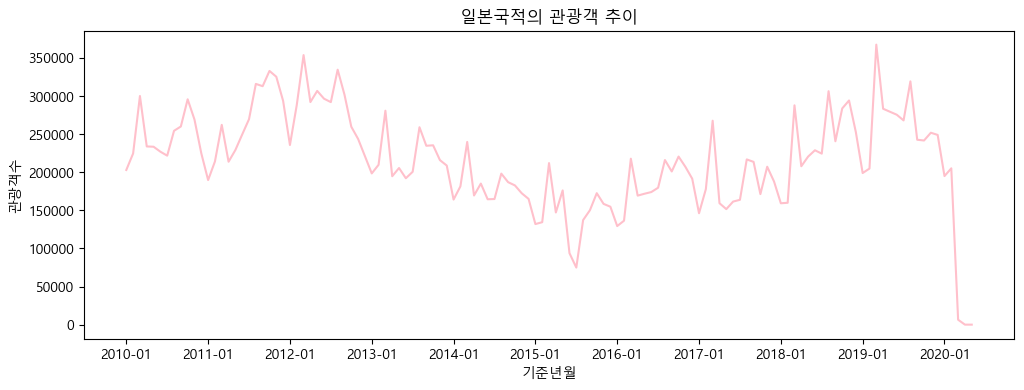

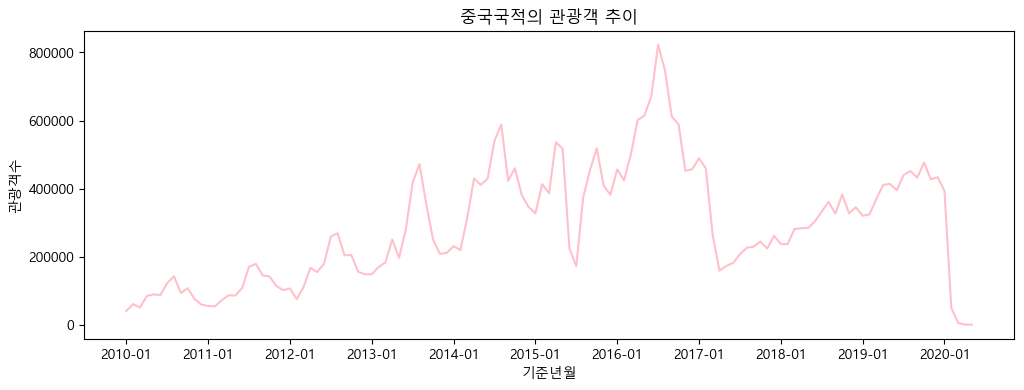

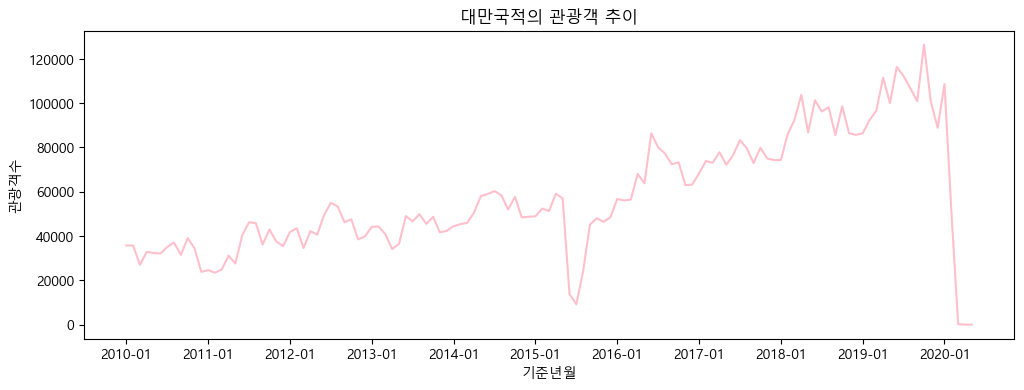

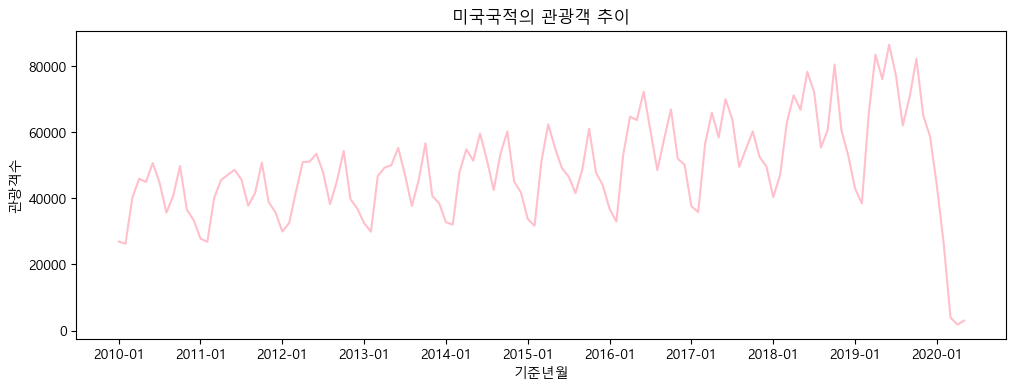

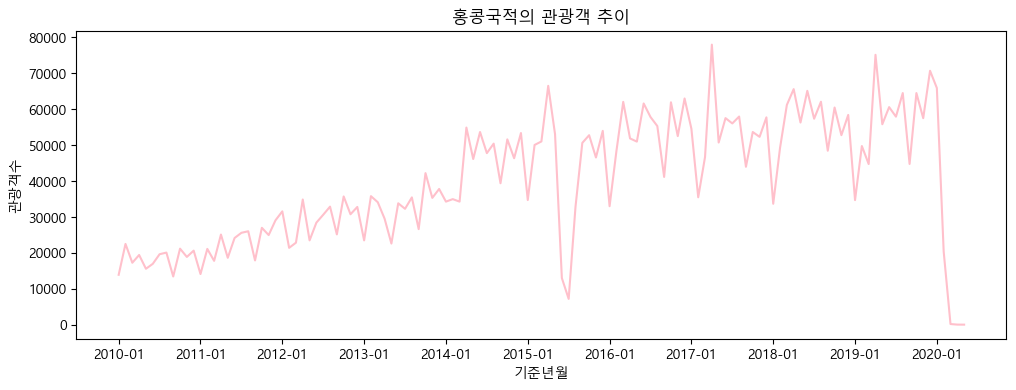

In [65]:
for country in country_list:
    # 해당 국적 관광객만 필터링
    df_filter = df[df["국적"] == country]
    
    # 그래프
    plt.figure(figsize = (12, 4))
    
    plt.plot(df_filter["기준년월"], df_filter["관광"], color = "pink")
    plt.title(f"{country}국적의 관광객 추이")
    plt.xlabel("기준년월")
    plt.ylabel("관광객수")
    plt.xticks(x_tick)

    plt.show()

## 히트맵

- x축에 month, y축에 year를 넣고 내용에는 관광객 숫자가 들어가는 히트맵

In [66]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [67]:
df["년도"] = df["기준년월"].str.slice(0, 4)
df["월"] = df["기준년월"].str.slice(5, 7)

In [68]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [69]:
# 중국 데이터 필터링
df_filter = df[df["국적"] == "중국"]

In [71]:
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [72]:
df_pivot = df_filter.pivot_table(index = "년도", columns = "월", values = "관광")
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


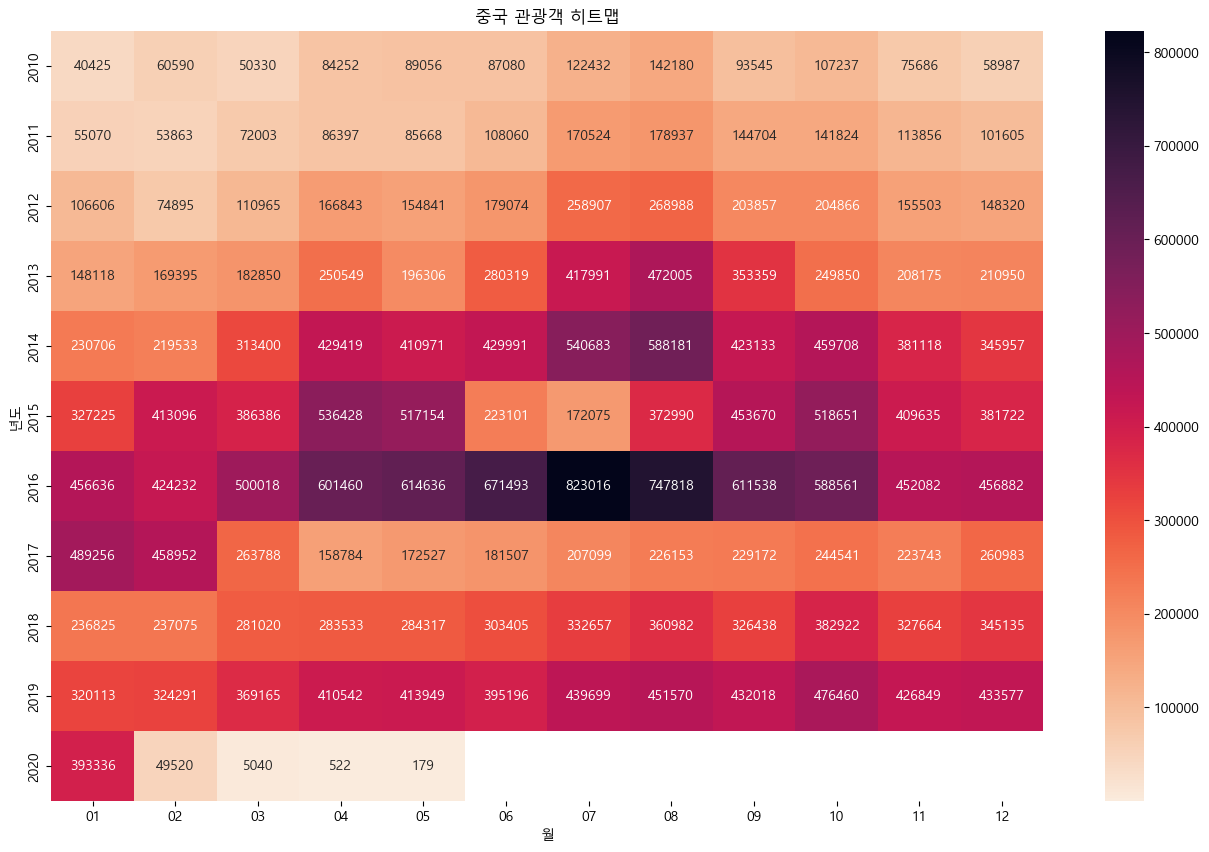

In [73]:
plt.figure(figsize = (16, 10))

sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")

plt.title("중국 관광객 히트맵")

plt.show()

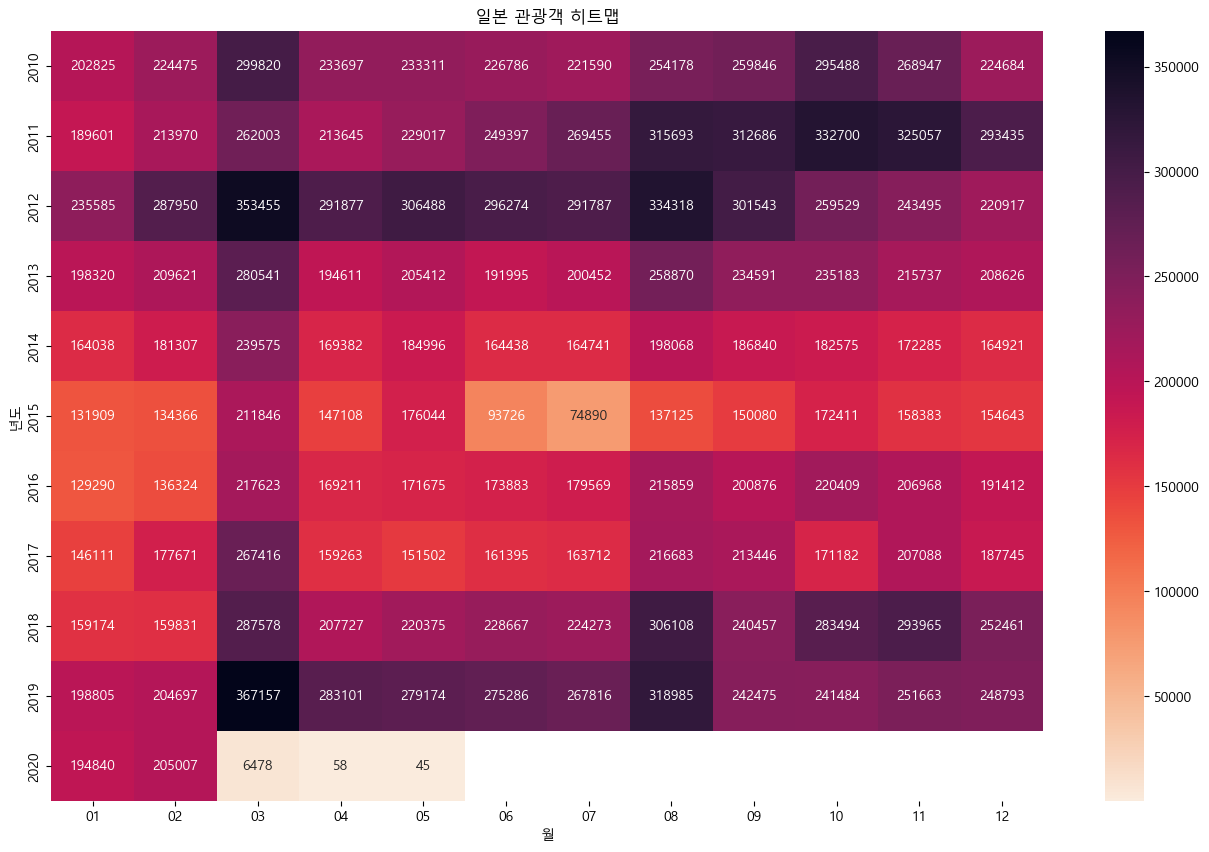

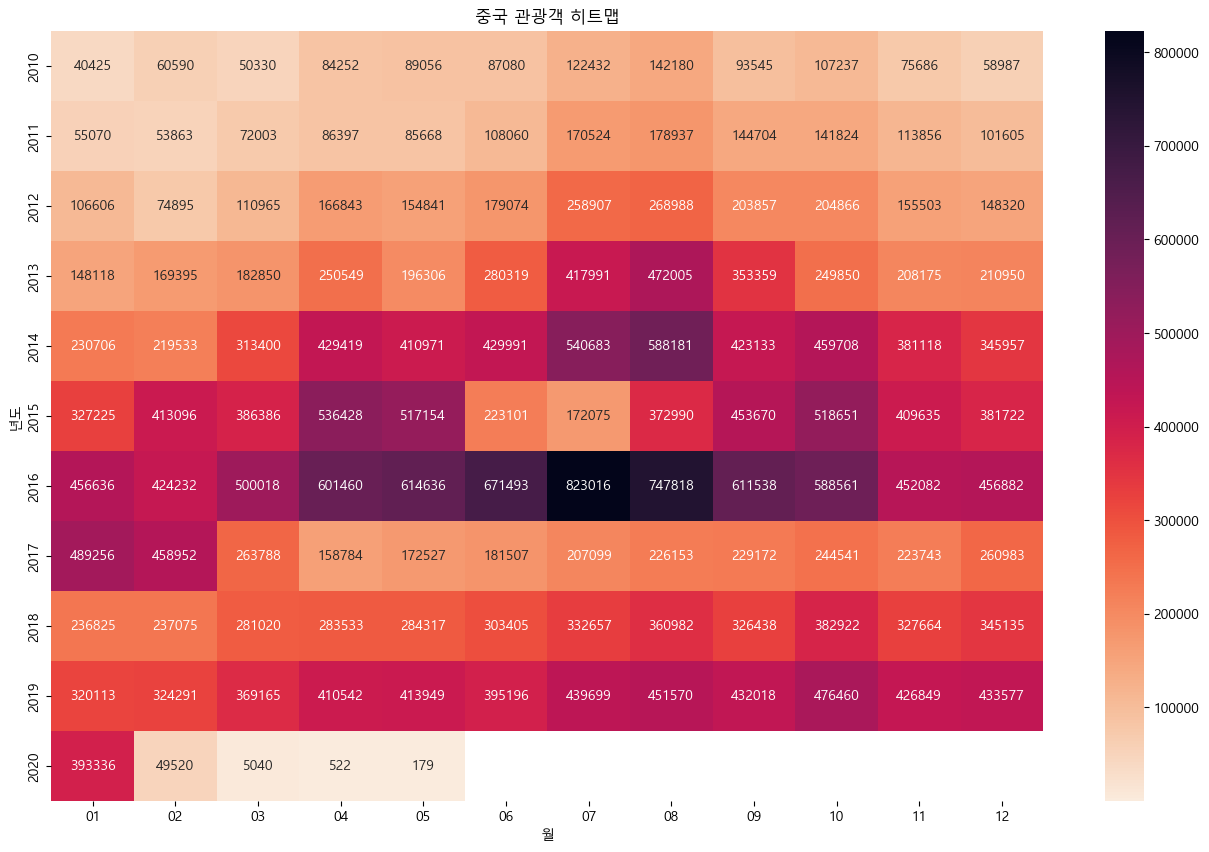

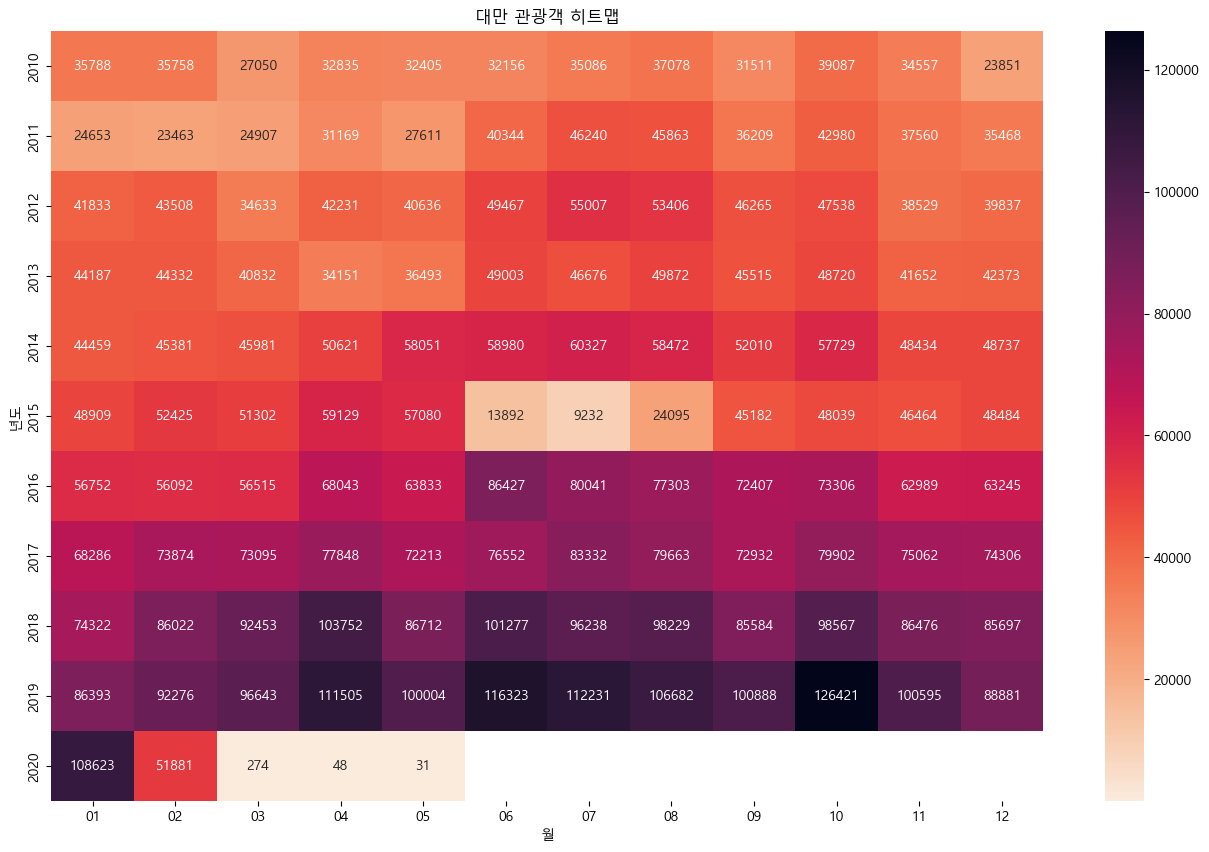

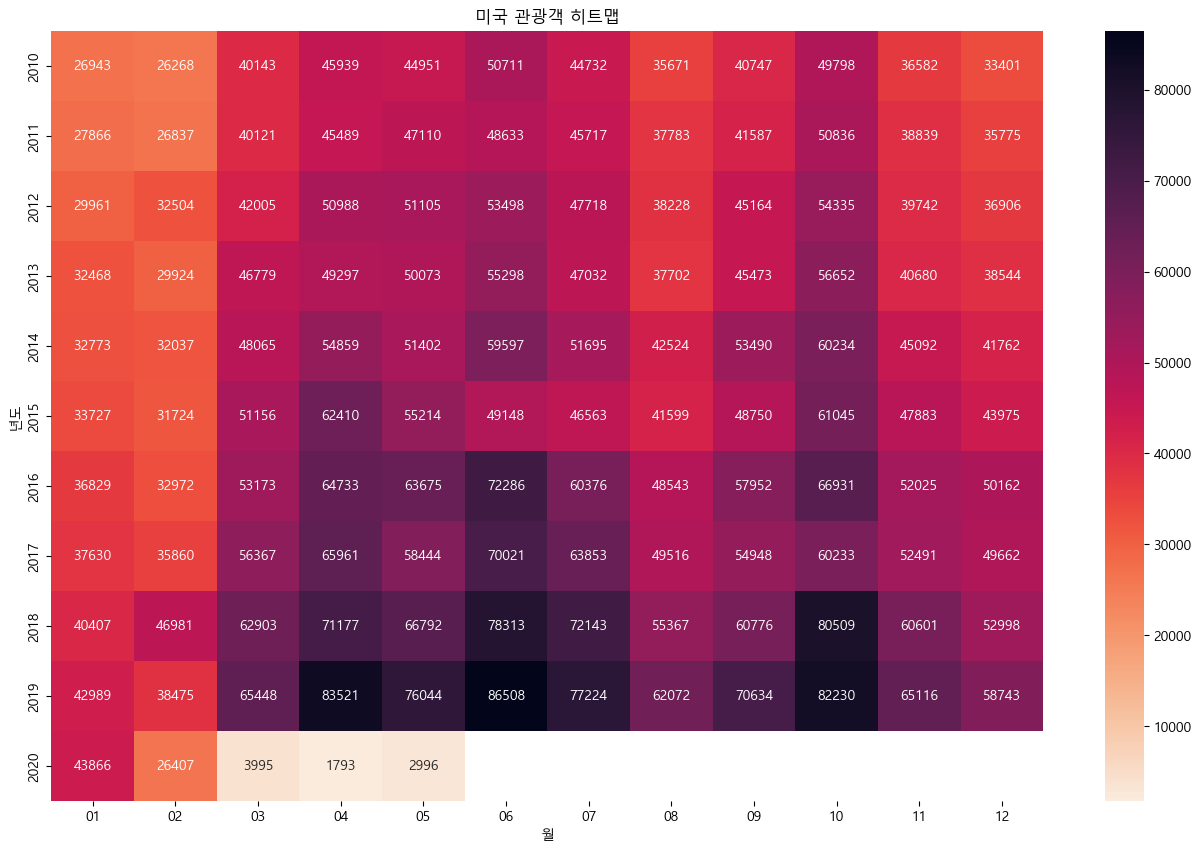

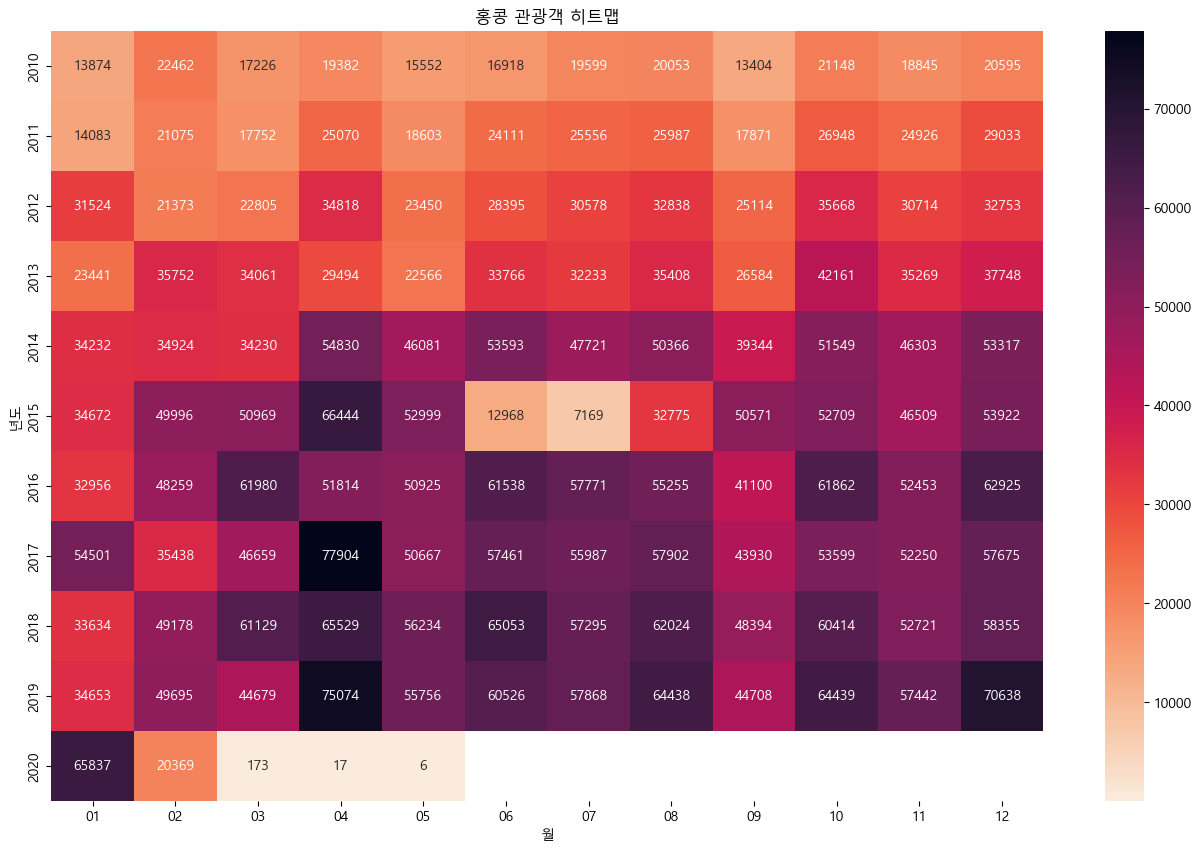

In [75]:
for country in country_list:
    df_filter = df[df["국적"] == country]
    
    df_pivot = df_filter.pivot_table(index = "년도", columns = "월", values = "관광")
    
    plt.figure(figsize = (16, 10))

    sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")

    plt.title(f"{country} 관광객 히트맵")

    plt.show()


# 시각화 해석

- 중국인 그래프에서 보이는 특징
    - 2010년부터 2016년까지 관광객 수가 꾸준히 증가하는 추세
    - 2017년 초에 관광객 수가 큰 폭으로 감소
    - 2017년 중순부터 관광객 수가 완만하게 증가하는 추세
    - 매년 여름에 관광객 수가 최댓값을 가짐
    - 단, 2015년 여름에는 관광객 수가 큰 폭으로 감소
    - 2020년 초에 관광객 수가 0에 가까워질만큼 급격히 감소
    
    - 계절적 특징
        - 여름 > 봄, 가을 > 겨울 순으로 많이 방문함
        
    - 트렌드
        - 중국인 관광객 수가 계속 증가
       
    - 이벤트 
        - 2015년 여름, 2017년 3월 2020년 2월에 부정적인 이벤트가 있음